# Import main library and run test experiment

Test that the library is correctly installed in the current virtual environment by doing a global import. Then, test the basic functionality by executing a test run with dummy data.

In order to install the library locally, navigate to its root folder and run the following command:

    pip install -e .
    
For running the simulation, we can either load a configuration file in the config folder, or write the configuration manually and adding it to the simulation handler

## Method 1: Using a configuration file

In [1]:
import spikingFT.startup
import matplotlib.pyplot as plt
import numpy as np

In [2]:
conf_file = "../config/test_experiment.json"
sim = spikingFT.startup.startup(conf_file)

INFO: Running spiking-FT:
- Configuration file: ../config/test_experiment.json
INFO: Loading data
INFO: Data loaded:
- Source: TI_sensor
- Nº frames: 1
- Nº chirps: 1
- Nº samples: 1024
INFO: Initializaing SNN simulation
INFO: Running SNN simulation
INFO: Execution finished


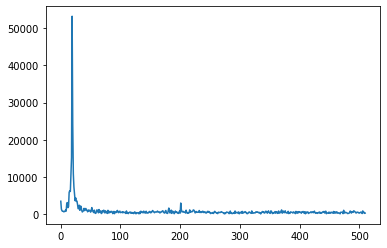

In [3]:
chirp_data = sim.encoded_data[0, 0, :, 0]
fft = np.abs(np.fft.fft(chirp_data))
plt.plot(fft[1:int(fft.size/2)])

## Method 2: Setting the configuration manually

In [15]:
import spikingFT.sim_handler
import matplotlib.pyplot as plt
import numpy as np
import os
import pathlib

In [31]:
path = "data/TI_radar"

config = {}
config["snn_config"] = {
    "iterations": 100,
    "mode": "dft",
    "framework": "loihi"
}
config["data"] = {
    "samples_per_chirp": 1024,
    "chirps_per_frame": 10,
    "antennas": 1,
    "nframes": 1
}

In [32]:
datapath = pathlib.Path('').resolve().parent.joinpath(datapath)
sim_handler = spikingFT.sim_handler.SimHandler(datapath, config)
sim_handler.run()

INFO: Loading data
INFO: Data loaded:
- Source: TI_sensor
- Nº frames: 1
- Nº chirps: 10
- Nº samples: 1024
INFO: Initializaing SNN simulation
INFO: Running SNN simulation


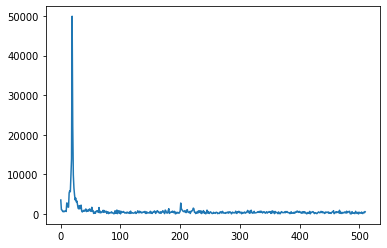

In [41]:
chirp_data = sim_handler.encoded_data[0, 5, :, 0]
fft = np.abs(np.fft.fft(chirp_data))
plt.plot(fft[1:int(fft.size/2)])

In [36]:
sim_handler.encoded_data.shape

(1, 10, 1024, 1)